We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to describe this and show it graphically, the dataset  given below. 
Task: 
1.fitting it to the periodic function 
2.plot the fit 
Data 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.optimize import curve_fit

In [3]:
Max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [4]:
prediction_min=[20,10,0]
prediction_max=[-60, 20, 0]

In [6]:
x_values=np.arange(12)

In [8]:
def temperature(times,avg,ampl,time_offset):
    return (avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))

result_min=curve_fit(temperature,x_values,Min,prediction_min)
result_max=curve_fit(temperature,x_values,Max,prediction_max)





In [9]:
residual_matrix_min,covariance_matrix_min=result_min
residual_matrix_max,covariance_matrix_max=result_max


In [10]:
residual_matrix_max

array([ 39.88861733, -10.59083161,   1.33370156])

In [11]:
residual_matrix_min

array([25.55626461, -7.74472963,  0.93101295])

In [13]:
x_new = np.linspace(0, 12, num=365)

Text(0, 0.5, 'Temperature ("degree")')

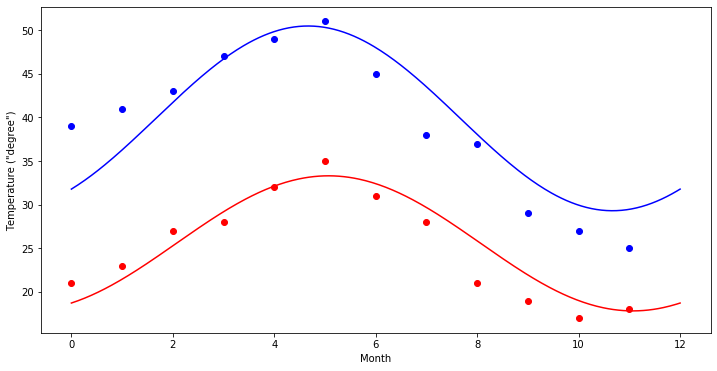

In [22]:
plt.figure(figsize=(12,6))
plt.plot(x_values,Min,'ro')
plt.plot(x_new,temperature(x_new,*residual_matrix_min),'r-')
plt.plot(x_values,Max,'bo')
plt.plot(x_new,temperature(x_new,*residual_matrix_max),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ("degree")')

In [24]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv' 

In [25]:
df=pd.read_csv(url)

In [27]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion 


In [33]:
df['sex'].count()

1309

In [45]:
a=df['sex'].value_counts()

([<matplotlib.patches.Wedge at 0x1f5f25bcbc8>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

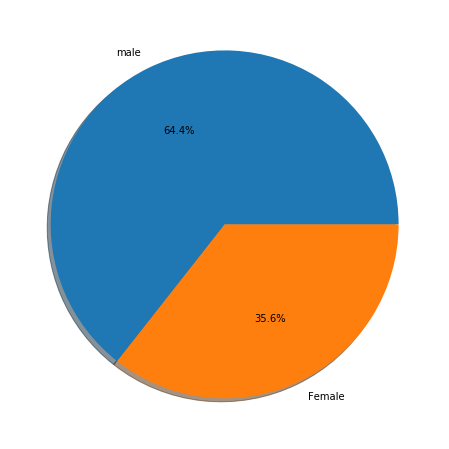

In [61]:
plt.figure(figsize=(12,8))
plt.pie(a,labels=['male','Female'] ,autopct='%1.1f%%',shadow=True)

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


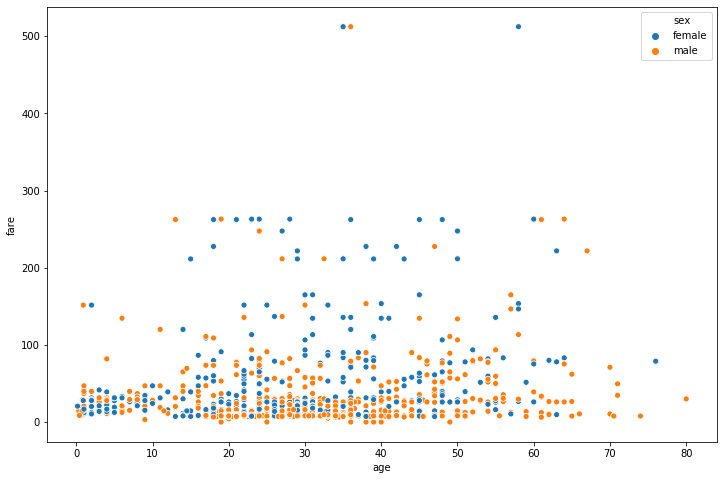

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['age'],df['fare'],hue='sex',data=df)